# Groupby

Para aquellos familiarizados con SQL, es el mismo groupby, y su funcion va a ser la de agrupar filas basadas en una columna para luego usar funciones de agregacion y dar informacion adicional, como la suma, el promedio, maximo, minimo, etc.

Las funciones de agregacion son aquellas que toman como entrada varios valores, pero devuelven solo 1.

Veamos a que nos referimos con esto

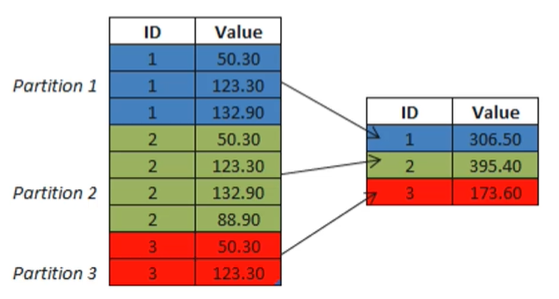

In [1]:
import numpy as np
import pandas as pd

# Creamos dataframe
data = {'Empresa':['IG','IG','TW','IG','FB','FB','TW','IG','TW','IG','FB','FB'],
       'Persona':['Samuel','Carlos','Ana','Vanesa','Carlos','Sara','Santiago','Carmen','Aurora','Vanina','Claudio','Sergio'],
       'Ventas':[200,120,340,124,243,350,200,243,350,120,340,124]}

df = pd.DataFrame(data)

In [2]:
df

Empresa   Persona  Ventas
0       IG    Samuel     200
1       IG    Carlos     120
2       TW       Ana     340
3       IG    Vanesa     124
4       FB    Carlos     243
5       FB      Sara     350
6       TW  Santiago     200
7       IG    Carmen     243
8       TW    Aurora     350
9       IG    Vanina     120
10      FB   Claudio     340
11      FB    Sergio     124

In [3]:
df.groupby('Empresa')

In [4]:
df.groupby('Empresa').sum()

Ventas
Empresa        
FB         1057
IG          807
TW          890

In [5]:
df.groupby('Empresa').mean()

Ventas
Empresa            
FB       264.250000
IG       161.400000
TW       296.666667

In [6]:
df.groupby('Empresa').count()

Persona  Ventas
Empresa                 
FB             4       4
IG             5       5
TW             3       3

In [7]:
df.loc[12] = ["FB",np.nan,100]

In [9]:
df.groupby('Empresa').count()

Persona  Ventas
Empresa                 
FB             4       5
IG             5       5
TW             3       3

In [12]:
df.groupby('Empresa').nunique()

Empresa  Persona  Ventas
Empresa                          
FB             1        4       5
IG             1        5       4
TW             1        3       3

In [14]:
df.loc[0,"Persona"] = 'Carlos'

In [15]:
df

Empresa   Persona  Ventas
0       IG    Carlos     200
1       IG    Carlos     120
2       TW       Ana     340
3       IG    Vanesa     124
4       FB    Carlos     243
5       FB      Sara     350
6       TW  Santiago     200
7       IG    Carmen     243
8       TW    Aurora     350
9       IG    Vanina     120
10      FB   Claudio     340
11      FB    Sergio     124
12      FB      None     100

In [16]:
df.groupby('Empresa').nunique()

Empresa  Persona  Ventas
Empresa                          
FB             1        4       5
IG             1        4       4
TW             1        3       3

In [18]:
df.groupby("Empresa").max()

Ventas
Empresa        
FB          350
IG          243
TW          350

##### Multiples funciones
Usamos el metodo `agg()` para usar mas de una funcion de agregacion.

Debemos pasarle como argumento una lista de todas las funciones de agregacion que queramo aplicar (en formato string) o bien un diccionario con las columnas y las funciones a aplicarle.

In [20]:
df.groupby("Empresa").agg(['sum','mean','min'])

Ventas                 
           sum        mean  min
Empresa                        
FB        1157  231.400000  100
IG         807  161.400000  120
TW         890  296.666667  200

In [21]:
df.groupby("Empresa").agg(['min','max'])

Ventas     
           min  max
Empresa            
FB         100  350
IG         120  243
TW         200  350

In [25]:
# si queremos elegir las columnas
df.groupby("Empresa").agg({"Genero":['min','max'], "Ventas":'sum'})

Genero             Ventas
           min         max    sum
Empresa                          
FB           F  sin_genero   1157
IG           F           M    807
TW           F           M    890

##### Multiples columnas

In [22]:
# le agregamos una nueva columna a nuestro dataframe
df["Genero"] = 'M M F F M F M F F F M M sin_genero'.split()

In [23]:
df

Empresa   Persona  Ventas      Genero
0       IG    Carlos     200           M
1       IG    Carlos     120           M
2       TW       Ana     340           F
3       IG    Vanesa     124           F
4       FB    Carlos     243           M
5       FB      Sara     350           F
6       TW  Santiago     200           M
7       IG    Carmen     243           F
8       TW    Aurora     350           F
9       IG    Vanina     120           F
10      FB   Claudio     340           M
11      FB    Sergio     124           M
12      FB      None     100  sin_genero

In [26]:
# y ahora podemos hacer gruop by por mas de una columna
df.groupby(['Empresa','Genero']).min()

Persona  Ventas
Empresa Genero                      
FB      F               Sara     350
        M             Carlos     124
        sin_genero       NaN     100
IG      F             Carmen     120
        M             Carlos     120
TW      F                Ana     340
        M           Santiago     200

In [27]:
# ver como hacer para agarrar un valor que querramos, porque ahora tenemos un multi index
mi_df = df.groupby(['Empresa','Genero']).min()

In [28]:
mi_df.loc[('FB',"F"),'Persona']

'Sara'

In [29]:
df.groupby(['Empresa','Genero']).count()

Persona  Ventas
Empresa Genero                     
FB      F                 1       1
        M                 3       3
        sin_genero        0       1
IG      F                 3       3
        M                 2       2
TW      F                 2       2
        M                 1       1

In [ ]:
# quiero ver quien es la persona masculina de la empresa FB que hizo menos ventas

# tarea

# .str

Esta funcionalidad de Pandas nos permite tratar a cada valor de una serie como si fuese un string, de manera que podemos aplicarles los metodos propios de los strings y metodos de pandas para strings.

Veamos algunos ejemplos.

In [30]:
import pandas as pd

In [31]:
# carguemos el siguiente dataframe sobre bibliotecas de la pagina del gobierno de bs as

# a los fines practicos voy a elegir que campos (columnas) cargar con el parametro 

biblio = pd.read_csv("http://cdn.buenosaires.gob.ar/datosabiertos/datasets/bibliotecas/bibliotecas.csv",
                     usecols= ['biblioteca','calle','direccion_normalizada','barrio','codigo_postal_argentino'])
biblio.head()

biblioteca                   calle  \
0     ALFONSINA STORNI               VENEZUELA   
1        ALVARO YUNQUE  SOLDADO DE LA FRONTERA   
2       ANTONIO DEVOTO            BAHIA BLANCA   
3  BALDOMERO F. MORENO       CONCEPCION ARENAL   
4         BENITO LYNCH              PJE. YRUPE   

                     direccion_normalizada        barrio  \
0  REPUBLICA BOLIVARIANA DE VENEZUELA 1538     MONSERRAT   
1          SOLDADO DE LA FRONTERA AV. 5210  VILLA LUGANO   
2                        BAHIA BLANCA 4025  VILLA DEVOTO   
3                  ARENAL, CONCEPCION 4206     CHACARITA   
4                               YRUPE 6714     MATADEROS   

  codigo_postal_argentino  
0                C1095ABF  
1                C1439FPH  
2                C1419BAI  
3                C1427EKR  
4                C1440BND

In [36]:
# queremos que los nombres de las bibliotecas esten en minuscula pero que comiencen con mayuscula

#biblio['biblioteca'].apply(lambda x : x.title())

# biblio['biblioteca'].str.title()

biblio['biblioteca'] = biblio['biblioteca'].str.title()

In [37]:
biblio.head()

biblioteca                   calle  \
0     Alfonsina Storni               VENEZUELA   
1        Alvaro Yunque  SOLDADO DE LA FRONTERA   
2       Antonio Devoto            BAHIA BLANCA   
3  Baldomero F. Moreno       CONCEPCION ARENAL   
4         Benito Lynch              PJE. YRUPE   

                     direccion_normalizada        barrio  \
0  REPUBLICA BOLIVARIANA DE VENEZUELA 1538     MONSERRAT   
1          SOLDADO DE LA FRONTERA AV. 5210  VILLA LUGANO   
2                        BAHIA BLANCA 4025  VILLA DEVOTO   
3                  ARENAL, CONCEPCION 4206     CHACARITA   
4                               YRUPE 6714     MATADEROS   

  codigo_postal_argentino  
0                C1095ABF  
1                C1439FPH  
2                C1419BAI  
3                C1427EKR  
4                C1440BND

In [39]:
# en cuanto al barrio queremos reemplazar las palabras VILLA por V.

#biblio['barrio'].str.replace("VILLA","V.")
biblio['barrio'] = biblio['barrio'].str.replace("VILLA","V.")

In [42]:
biblio.head()

biblioteca                   calle  \
0     Alfonsina Storni               VENEZUELA   
1        Alvaro Yunque  SOLDADO DE LA FRONTERA   
2       Antonio Devoto            BAHIA BLANCA   
3  Baldomero F. Moreno       CONCEPCION ARENAL   
4         Benito Lynch              PJE. YRUPE   

                     direccion_normalizada     barrio codigo_postal_argentino  
0  REPUBLICA BOLIVARIANA DE VENEZUELA 1538  MONSERRAT                C1095ABF  
1          SOLDADO DE LA FRONTERA AV. 5210  V. LUGANO                C1439FPH  
2                        BAHIA BLANCA 4025  V. DEVOTO                C1419BAI  
3                  ARENAL, CONCEPCION 4206  CHACARITA                C1427EKR  
4                               YRUPE 6714  MATADEROS                C1440BND

In [43]:
# queremos obtener los numeros de la direccion normalizada, para crear una nueva columna llamada 'numero'

biblio['direccion_normalizada'].str.contains(r'[0-9]+')


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19    False
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27     True
28     True
29      NaN
Name: direccion_normalizada, dtype: object

In [44]:
biblio.tail()

biblioteca                        calle  \
25         Nora Lange  AV. FRANCISCO F. DE LA CRUZ   
26    Rafael Obligado           PJE. CRAINQUEVILLE   
27       Reina Batata                     LA PAMPA   
28  Ricardo Güiraldes                   TALCAHUANO   
29            Mafalda              CALLE COMERCIAL   

                                direccion_normalizada         barrio  \
25  FERNANDEZ DE LA CRUZ, F., GRAL. AV. Y ESCALADA...      V. LUGANO   
26                                 CRAINQUEVILLE 2233  V. SANTA RITA   
27                LA PAMPA Y 11 DE SEPTIEMBRE DE 1888       BELGRANO   
28                                    TALCAHUANO 1261         RETIRO   
29                                                NaN         RETIRO   

   codigo_postal_argentino  
25                     NaN  
26                C1416AVC  
27                     NaN  
28                C1014ADA  
29                     NaN

In [45]:
biblio.loc[[13,19,25],:]

biblioteca                        calle  \
13  Javier Villafañe                 ANA M. JANER   
19         La Prensa                       PEPIRI   
25        Nora Lange  AV. FRANCISCO F. DE LA CRUZ   

                                direccion_normalizada            barrio  \
13                                   JANER, ANA MARIA            FLORES   
19                              PEPIRI Y PAZ, JOSE C.  PARQUE PATRICIOS   
25  FERNANDEZ DE LA CRUZ, F., GRAL. AV. Y ESCALADA...         V. LUGANO   

   codigo_postal_argentino  
13                     NaN  
19                     NaN  
25                     NaN

In [47]:
biblio['numero'] =  biblio['direccion_normalizada'].str.extract(r'([0-9]+)')

In [48]:
biblio.head()

biblioteca                   calle  \
0     Alfonsina Storni               VENEZUELA   
1        Alvaro Yunque  SOLDADO DE LA FRONTERA   
2       Antonio Devoto            BAHIA BLANCA   
3  Baldomero F. Moreno       CONCEPCION ARENAL   
4         Benito Lynch              PJE. YRUPE   

                     direccion_normalizada     barrio codigo_postal_argentino  \
0  REPUBLICA BOLIVARIANA DE VENEZUELA 1538  MONSERRAT                C1095ABF   
1          SOLDADO DE LA FRONTERA AV. 5210  V. LUGANO                C1439FPH   
2                        BAHIA BLANCA 4025  V. DEVOTO                C1419BAI   
3                  ARENAL, CONCEPCION 4206  CHACARITA                C1427EKR   
4                               YRUPE 6714  MATADEROS                C1440BND   

  numero  
0   1538  
1   5210  
2   4025  
3   4206  
4   6714

#### Caso practico

Supongamos que tenemos una serie con los siguientes datos

In [49]:
lista = ['  36,80 ','  40,10 ','  37,90 ','  38,50 ','  38,50 ','  39,60 ','  37,10 ','  38,70 ','  39,50 ','  41,10 ','  41,00 ','  41,30 ','  40,90 ','  41,70 ','  43,00 ','  43,40 ','  41,70 ','  41,80 ','  40,90 ','  43,90 ','  42,90 ','  42,60 ','  41,20 ','  41,80 ','  41,70 ','  40,40 ','  41,30 ','  41,20 ','  42,40 ','  42,10 ','  44,70 ','  44,10 ','  42,40 ','  42,80 ','  41,80 ','  44,30 ','  44,20 ','  44,60 ','  40,70 ','  42,00 ','  44,20 ','  44,80 ','  42,80 ','  43,90 ','  43,30 ','  42,90 ','  43,02 ','  42,80 ','  43,25 ',' - ','     -    ','  41,99 ','  42,70 ','  41,04 ','  41,00 ','  41,90 ','  42,10 ','  42,10 ','  43,40 ','  43,10 ','  45,20 ','  43,70 ','  42,60 ','42,3','44,4','42,4','41,8','35,1']

In [50]:
serie = pd.Series(lista)

In [51]:
serie

0       36,80 
1       40,10 
2       37,90 
3       38,50 
4       38,50 
        ...   
63        42,3
64        44,4
65        42,4
66        41,8
67        35,1
Length: 68, dtype: object

In [52]:
# queremos convertir la serie a tipo float para hacer operaciones
# veamos que datos tenemos

serie.value_counts()

  42,80       3
  41,70       3
  42,10       3
  41,80       3
  43,90       2
  43,40       2
  44,20       2
  41,00       2
  42,90       2
  41,30       2
  40,90       2
  42,60       2
  42,40       2
  38,50       2
  41,20       2
     -        1
41,8          1
  37,90       1
  43,25       1
  41,90       1
  44,10       1
  41,04       1
  44,60       1
  45,20       1
  41,99       1
  38,70       1
  37,10       1
35,1          1
42,3          1
  43,02       1
  44,70       1
  36,80       1
  43,30       1
44,4          1
  39,60       1
  44,30       1
  40,40       1
  43,10       1
  43,70       1
  41,10       1
 -            1
  39,50       1
  42,70       1
  42,00       1
  40,70       1
42,4          1
  40,10       1
  44,80       1
  43,00       1
dtype: int64

In [53]:
serie.astype(float)

ValueError: could not convert string to float: '  36,80 '

In [54]:
# reemplazamos esa coma por un punto en cada uno de los casos
serie = serie.str.replace(',','.')

In [55]:
serie.value_counts()

  42.10       3
  41.80       3
  41.70       3
  42.80       3
  43.90       2
  41.30       2
  42.40       2
  42.60       2
  40.90       2
  38.50       2
  44.20       2
  43.40       2
  42.90       2
  41.00       2
  41.20       2
  40.40       1
  37.90       1
  43.30       1
35.1          1
  37.10       1
  41.10       1
  41.99       1
  38.70       1
  45.20       1
     -        1
  41.90       1
  40.70       1
  44.70       1
  43.10       1
42.4          1
  40.10       1
  44.60       1
  44.80       1
  41.04       1
42.3          1
  43.00       1
  43.02       1
  44.30       1
  42.70       1
  44.10       1
  43.25       1
  39.50       1
  43.70       1
44.4          1
 -            1
41.8          1
  42.00       1
  36.80       1
  39.60       1
dtype: int64

In [56]:
# eliminamos los espacios delante y detras de nuestros strings
#.strip()
serie = serie.str.strip()

In [57]:
serie.value_counts()

42.10    3
42.80    3
41.80    3
41.70    3
41.00    2
42.90    2
41.30    2
42.60    2
40.90    2
42.40    2
43.40    2
41.20    2
38.50    2
44.20    2
-        2
43.90    2
41.8     1
43.02    1
43.70    1
43.25    1
41.04    1
40.10    1
42.00    1
36.80    1
42.3     1
43.00    1
37.90    1
44.70    1
41.90    1
44.80    1
44.4     1
42.70    1
39.60    1
43.30    1
44.10    1
35.1     1
37.10    1
40.40    1
38.70    1
42.4     1
39.50    1
44.60    1
40.70    1
43.10    1
45.20    1
41.10    1
44.30    1
41.99    1
dtype: int64

In [58]:
# reemplazamos el valor '-' por un objeto Nan
serie.replace('-',np.nan,inplace=True)

In [59]:
#convertimos a float
serie.value_counts()

42.10    3
41.80    3
42.80    3
41.70    3
41.20    2
42.90    2
41.30    2
42.60    2
41.00    2
40.90    2
42.40    2
43.40    2
43.90    2
38.50    2
44.20    2
43.25    1
43.02    1
40.10    1
41.8     1
43.70    1
42.00    1
36.80    1
42.3     1
41.04    1
43.00    1
37.90    1
44.70    1
41.90    1
45.20    1
44.80    1
42.4     1
42.70    1
39.60    1
43.30    1
44.10    1
35.1     1
37.10    1
40.40    1
44.4     1
38.70    1
39.50    1
44.60    1
40.70    1
43.10    1
41.10    1
44.30    1
41.99    1
dtype: int64

In [60]:
serie.astype(float)

0     36.8
1     40.1
2     37.9
3     38.5
4     38.5
      ... 
63    42.3
64    44.4
65    42.4
66    41.8
67    35.1
Length: 68, dtype: float64